In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
realstate= pd.read_csv('C:\Data\Real estate.csv')
realstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [25]:
realstate.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [26]:
realstate.duplicated().sum()

0

In [27]:
df=realstate.drop_duplicates()

In [28]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [29]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [30]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 29.1 KB


<Axes: xlabel='No', ylabel='Y house price of unit area'>

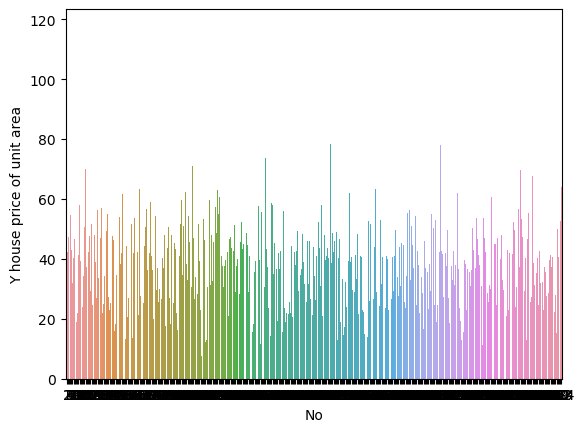

In [32]:
sns.barplot(x=df['No'],y=df['Y house price of unit area'])

In [33]:
df.corr()['Y house price of unit area']

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

In [34]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


<Axes: >

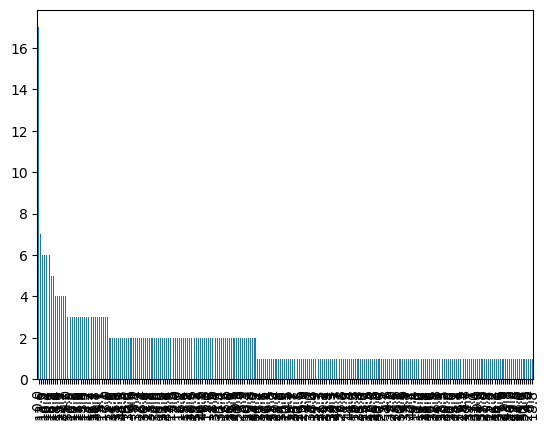

In [35]:
df['X2 house age'].value_counts().plot(kind='bar')

<Axes: >

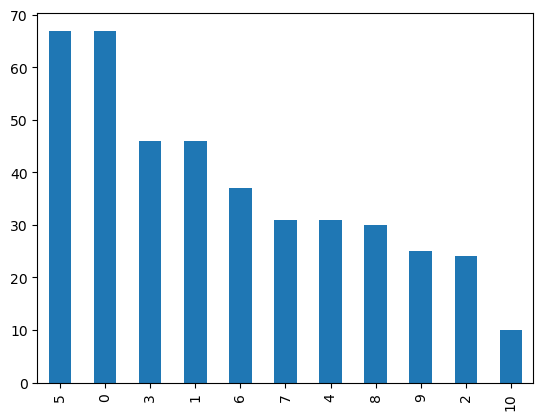

In [36]:
df['X4 number of convenience stores'].value_counts().plot(kind='bar')

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

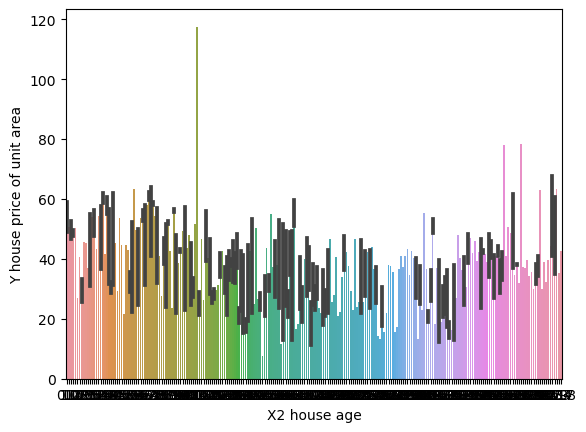

In [37]:
sns.barplot(x=df['X2 house age'],y=df['Y house price of unit area'])

In [38]:
df.corr()['Y house price of unit area']

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

In [39]:
X= df[['No','X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [40]:
Y= np.where(df['Y house price of unit area'].shift(-1)>df['Y house price of unit area'],1,-1)

In [41]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [42]:
#decisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.62


In [43]:
probability = model.predict_proba(X_test)
print(probability)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [44]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1, -1, -1, -1])

In [45]:
from sklearn import metrics

In [46]:
print(metrics.confusion_matrix(Y_test, predicted))

[[43 28]
 [19 35]]


In [47]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.69      0.61      0.65        71
           1       0.56      0.65      0.60        54

    accuracy                           0.62       125
   macro avg       0.62      0.63      0.62       125
weighted avg       0.63      0.62      0.63       125



In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.72
Test_data Accuracy: 0.73


In [50]:
probability = knn.predict_proba(X_test)
print(probability)

[[0.66666667 0.33333333]
 [0.6        0.4       ]
 [0.8        0.2       ]
 [0.6        0.4       ]
 [0.53333333 0.46666667]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.2        0.8       ]
 [0.6        0.4       ]
 [0.13333333 0.86666667]
 [0.8        0.2       ]
 [0.8        0.2       ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.2        0.8       ]
 [0.66666667 0.33333333]
 [0.8        0.2       ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.2        0.8       ]
 [0.2        0.8       ]
 [0.6        0.4       ]
 [0.66666667 0.33333333]
 [0.8        0.2       ]
 [0.6        0.4       ]
 [0.2        0.8       ]
 [0.73333333 0.26666667]
 [0.4        0.6       ]
 [0.6        0.4       ]
 [0.73333333 0.26666667]
 [0.13333333 0.86666667]
 [0.4        0.6       ]
 [0.73333333 0.26666667]
 [0.73333333 0.26666667]
 [0.2        0.8       ]
 [0.6        0.4       ]
 [0.8        0.2       ]
 [0.4        0.6       ]
 [0.2        0.8       ]


In [51]:
predicted = knn.predict(X_test)

In [52]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))

[[56 15]
 [19 35]]


In [53]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.75      0.79      0.77        71
           1       0.70      0.65      0.67        54

    accuracy                           0.73       125
   macro avg       0.72      0.72      0.72       125
weighted avg       0.73      0.73      0.73       125



In [54]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [55]:
lr = LogisticRegression()
lr = lr.fit (X_train,Y_train)

In [56]:
probability = lr.predict_proba(X_test)
print(probability)

[[0.72070804 0.27929196]
 [0.29780559 0.70219441]
 [0.85775208 0.14224792]
 [0.68070484 0.31929516]
 [0.78005771 0.21994229]
 [0.64655934 0.35344066]
 [0.36681003 0.63318997]
 [0.59792145 0.40207855]
 [0.46123015 0.53876985]
 [0.12099295 0.87900705]
 [0.74793987 0.25206013]
 [0.79129769 0.20870231]
 [0.30383923 0.69616077]
 [0.37209796 0.62790204]
 [0.30490427 0.69509573]
 [0.42711281 0.57288719]
 [0.70987334 0.29012666]
 [0.60162391 0.39837609]
 [0.23719356 0.76280644]
 [0.70967996 0.29032004]
 [0.27889652 0.72110348]
 [0.42437094 0.57562906]
 [0.60347722 0.39652278]
 [0.68339408 0.31660592]
 [0.78918852 0.21081148]
 [0.80182729 0.19817271]
 [0.41966717 0.58033283]
 [0.79627024 0.20372976]
 [0.55663972 0.44336028]
 [0.8810943  0.1189057 ]
 [0.5551243  0.4448757 ]
 [0.13328329 0.86671671]
 [0.59398249 0.40601751]
 [0.62173335 0.37826665]
 [0.65913231 0.34086769]
 [0.46111468 0.53888532]
 [0.62346497 0.37653503]
 [0.86396722 0.13603278]
 [0.70520609 0.29479391]
 [0.49737582 0.50262418]


In [57]:
accuracy_train = accuracy_score(Y_train, lr.predict(X_train))
accuracy_test = accuracy_score(Y_test, lr.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.69
Test_data Accuracy: 0.71


In [58]:
predic = lr.predict(X_test)
print(metrics.confusion_matrix(Y_test, predic))

[[59 12]
 [24 30]]


In [59]:
print(metrics.classification_report(Y_test, predic))

              precision    recall  f1-score   support

          -1       0.71      0.83      0.77        71
           1       0.71      0.56      0.63        54

    accuracy                           0.71       125
   macro avg       0.71      0.69      0.70       125
weighted avg       0.71      0.71      0.71       125



In [60]:
#RandomForest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [61]:
rfc = RandomForestClassifier(n_estimators=16)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [62]:
probability = rfc.predict_proba(X_test)
print(probability)

[[0.875  0.125 ]
 [0.125  0.875 ]
 [1.     0.    ]
 [0.4375 0.5625]
 [0.25   0.75  ]
 [0.8125 0.1875]
 [0.375  0.625 ]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.125  0.875 ]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.375  0.625 ]
 [0.5    0.5   ]
 [0.1875 0.8125]
 [0.0625 0.9375]
 [1.     0.    ]
 [0.375  0.625 ]
 [0.5    0.5   ]
 [0.8125 0.1875]
 [0.0625 0.9375]
 [0.375  0.625 ]
 [0.5625 0.4375]
 [0.8125 0.1875]
 [1.     0.    ]
 [0.5625 0.4375]
 [0.125  0.875 ]
 [0.8125 0.1875]
 [0.3125 0.6875]
 [0.875  0.125 ]
 [0.75   0.25  ]
 [0.     1.    ]
 [0.5625 0.4375]
 [0.3125 0.6875]
 [0.75   0.25  ]
 [0.     1.    ]
 [0.5    0.5   ]
 [0.9375 0.0625]
 [0.5625 0.4375]
 [0.125  0.875 ]
 [0.     1.    ]
 [0.0625 0.9375]
 [0.     1.    ]
 [0.3125 0.6875]
 [0.75   0.25  ]
 [0.5625 0.4375]
 [0.8125 0.1875]
 [0.25   0.75  ]
 [0.3125 0.6875]
 [0.4375 0.5625]
 [0.8125 0.1875]
 [0.3125 0.6875]
 [0.1875 0.8125]
 [1.     0.    ]
 [0.625  0.375 ]
 [0.375  0.625 ]
 [0.9375 0.0625]
 [0.0625 0.9375]
 [0.1875 0.812

In [63]:
accuracy_train = accuracy_score(Y_train, rfc.predict(X_train))
accuracy_test = accuracy_score(Y_test, rfc.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 1.00
Test_data Accuracy: 0.70


In [64]:
from sklearn.metrics import confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))

[[52 19]
 [18 36]]


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.74      0.73      0.74        71
           1       0.65      0.67      0.66        54

    accuracy                           0.70       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.70      0.70      0.70       125



In [76]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [77]:
#Initializing the MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [78]:
accuracy_Train = accuracy_score(Y_train, mlp.predict(X_train))
accuracy_Test = accuracy_score(Y_test, mlp.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.69
Test_data Accuracy: 0.71


In [79]:
from sklearn.metrics import confusion_matrix
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(Y_test, mlp_pred))

[[55 16]
 [20 34]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, mlp_pred))

              precision    recall  f1-score   support

          -1       0.73      0.77      0.75        71
           1       0.68      0.63      0.65        54

    accuracy                           0.71       125
   macro avg       0.71      0.70      0.70       125
weighted avg       0.71      0.71      0.71       125



In [81]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB()

In [82]:
accuracy_Train = accuracy_score(Y_train, gb.predict(X_train))
accuracy_Test = accuracy_score(Y_test, gb.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.70
Test_data Accuracy: 0.73


In [83]:
from sklearn.metrics import confusion_matrix
gb_pred = gb.predict(X_test)
print(confusion_matrix(Y_test, gb_pred))

[[57 14]
 [20 34]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

          -1       0.74      0.80      0.77        71
           1       0.71      0.63      0.67        54

    accuracy                           0.73       125
   macro avg       0.72      0.72      0.72       125
weighted avg       0.73      0.73      0.73       125



In [87]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sv=SVC()
sv.fit(X_train,Y_train)

SVC()

In [88]:
# accuracy score, confusion matrix and classification report of knn

sv_acc = accuracy_score(Y_test, sv.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(Y_train, sv.predict(X_train))}")
print(f"Test Accuracy of SVM is {sv_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, sv.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, sv.predict(X_test))}")

Training Accuracy of SVM is 0.6816608996539792
Test Accuracy of SVM is 0.72 

Confusion Matrix :- 
[[57 14]
 [21 33]]

Classification Report :- 
               precision    recall  f1-score   support

          -1       0.73      0.80      0.77        71
           1       0.70      0.61      0.65        54

    accuracy                           0.72       125
   macro avg       0.72      0.71      0.71       125
weighted avg       0.72      0.72      0.72       125

